In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.3f}'.format

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# paths
test_data = '../input/house-prices-advanced-regression-techniques/test.csv'
train_data = '../input/house-prices-advanced-regression-techniques/train.csv'

# reading csv
test = pd.read_csv(test_data)
train = pd.read_csv(train_data)

Firstly, dealing with NaN values in this dataset

In [3]:
# nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)


,Column,Null %,Data type
16,PoolQC,99.520000,object
18,MiscFeature,96.300000,object
1,Alley,93.770000,object
17,Fence,80.750000,object
10,FireplaceQu,47.260000,object
0,LotFrontage,17.740000,float64
11,GarageType,5.550000,object
12,GarageYrBlt,5.550000,float64
13,GarageFinish,5.550000,object
14,GarageQual,5.550000,object


PoolQC, MiscFeature, Alley and Fence will be dropped.

In [4]:
# dropping anything with greater than 50% missing from the dataset
unwanted_col = []

for i in non_values['Null %']:
    if i > 50:
        index = non_values.loc[non_values['Null %'] == i].index
        col_name = non_values['Column'][index]
        train.drop(columns=col_name, inplace=True)
        test.drop(columns=col_name, inplace=True)
        
# revisiting the nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)

,Column,Null %,Data type
9,FireplaceQu,47.260000,object
0,LotFrontage,17.740000,float64
10,GarageType,5.550000,object
11,GarageYrBlt,5.550000,float64
12,GarageFinish,5.550000,object
13,GarageQual,5.550000,object
14,GarageCond,5.550000,object
5,BsmtExposure,2.600000,object
7,BsmtFinType2,2.600000,object
3,BsmtQual,2.530000,object


We will deal with all the objects first.

Visualisation for MasVnrType



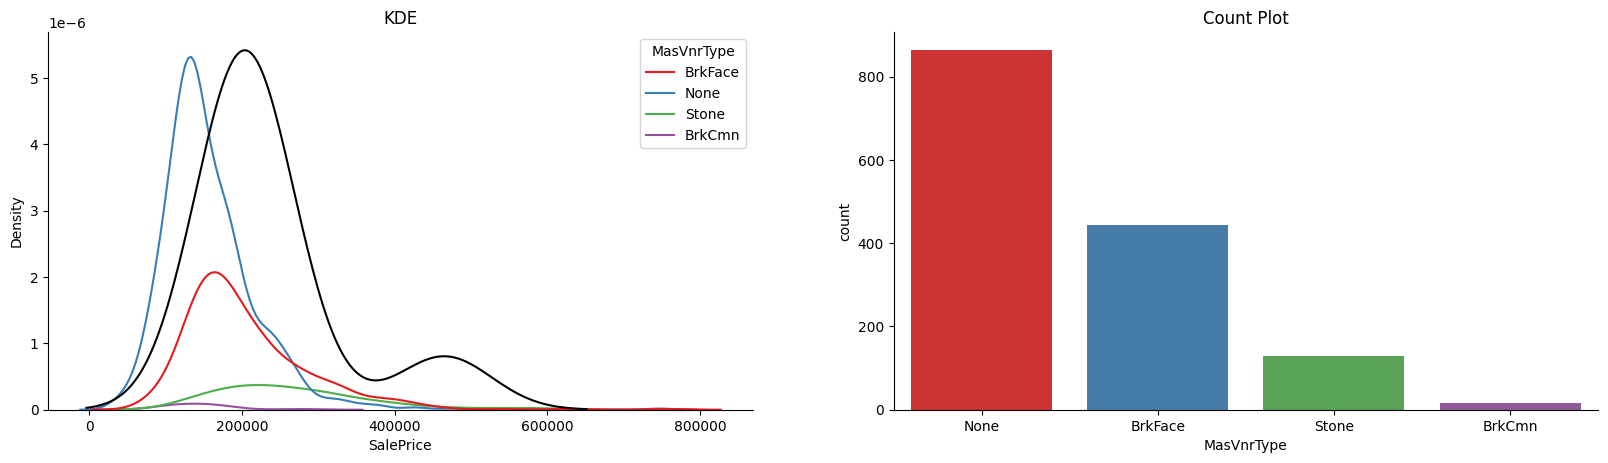

Black for KDE is missing values

Missing values make up : 0.548% of this dataset

The mode is : None

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for BsmtQual



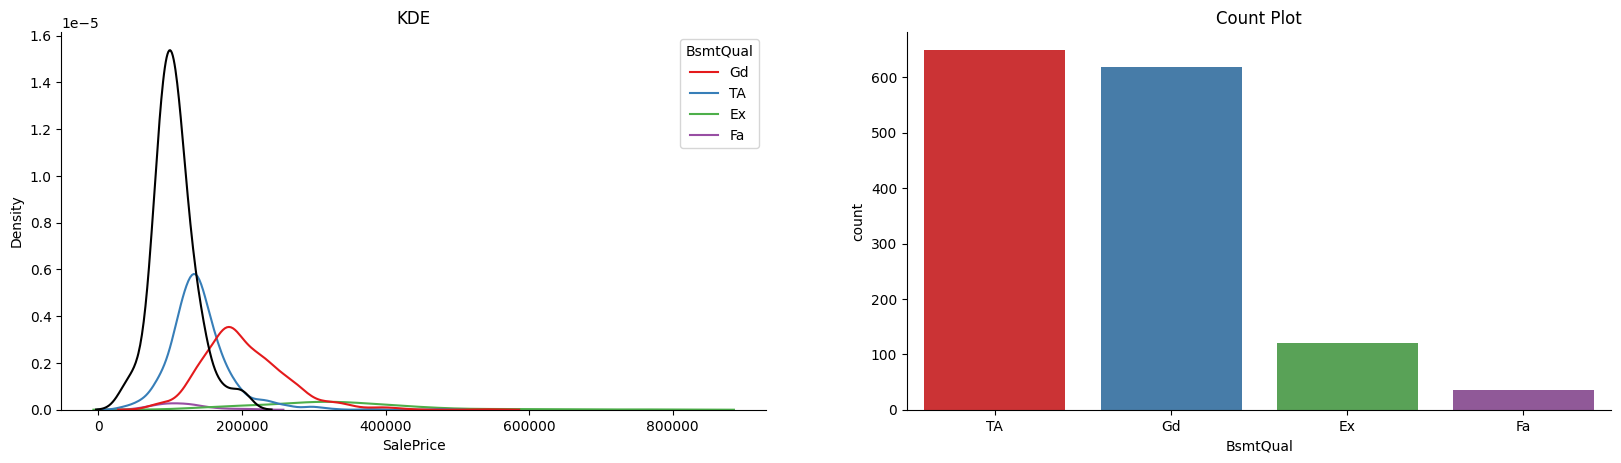

Black for KDE is missing values

Missing values make up : 2.53% of this dataset

The mode is : TA

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for BsmtCond



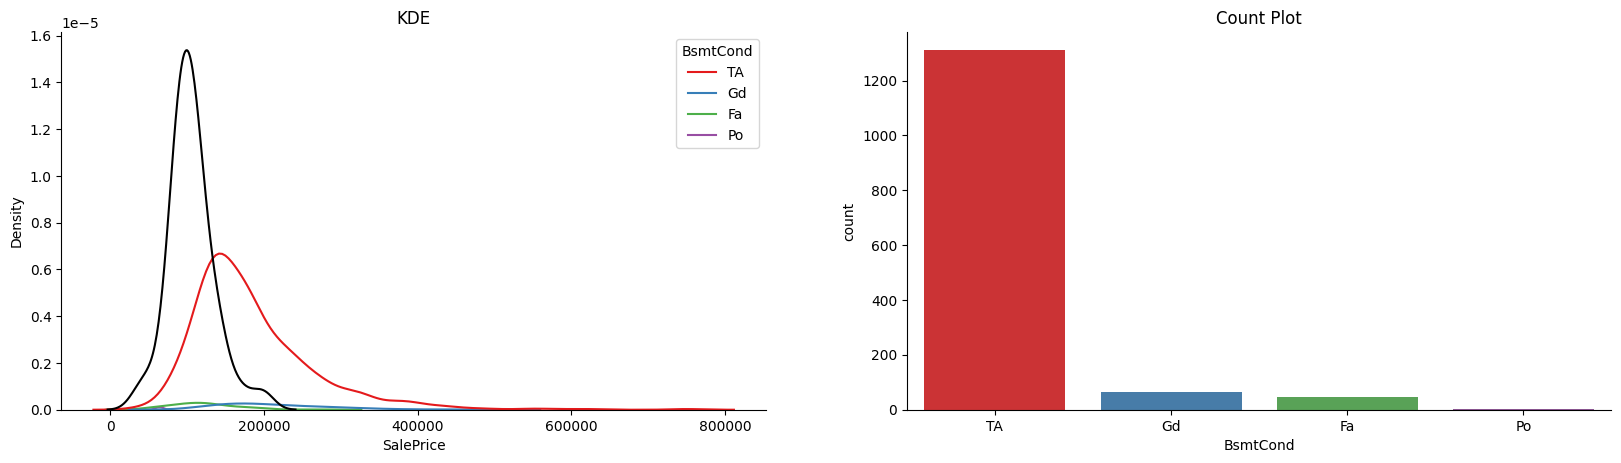

Black for KDE is missing values

Missing values make up : 2.53% of this dataset

The mode is : TA

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for BsmtExposure



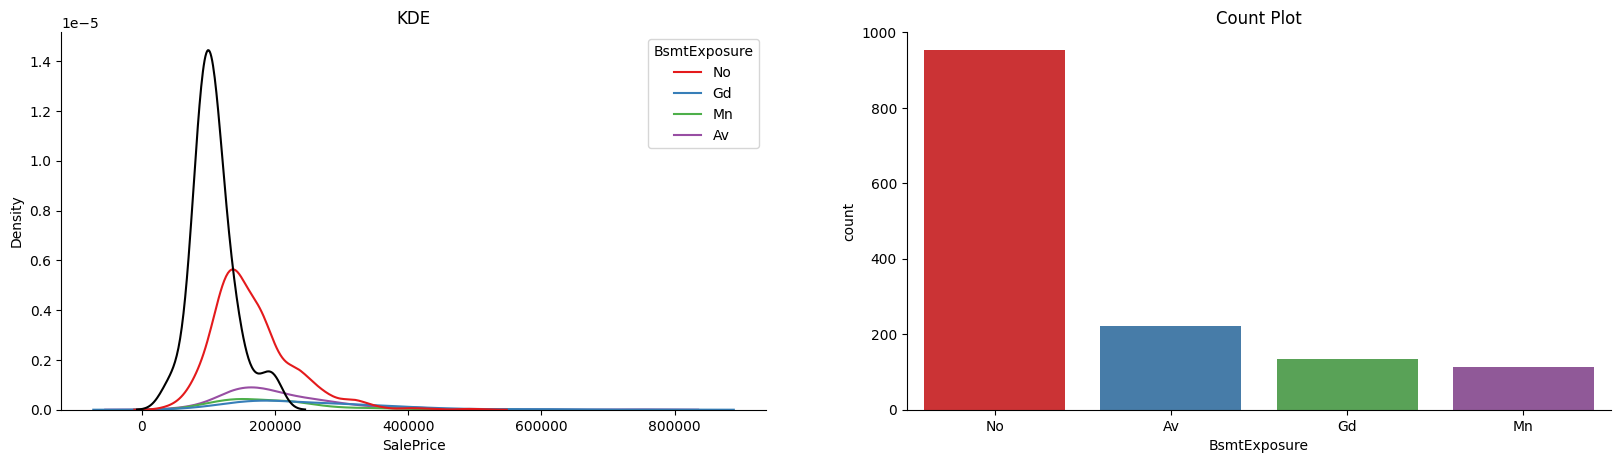

Black for KDE is missing values

Missing values make up : 2.6% of this dataset

The mode is : No

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for BsmtFinType1



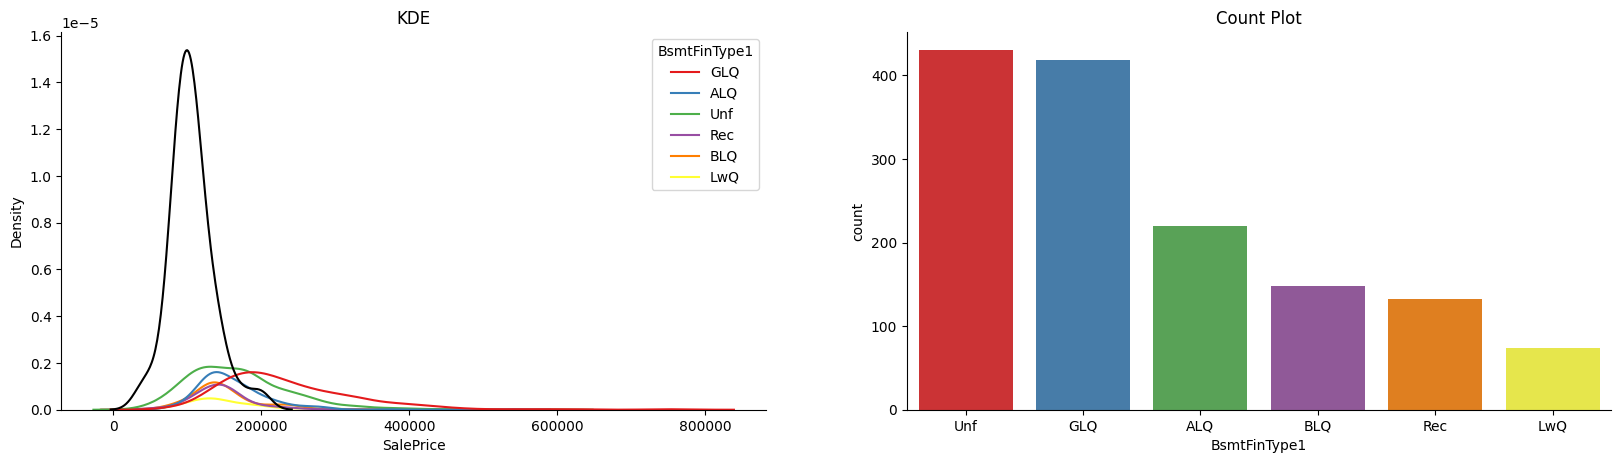

Black for KDE is missing values

Missing values make up : 2.53% of this dataset

The mode is : Unf

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for BsmtFinType2



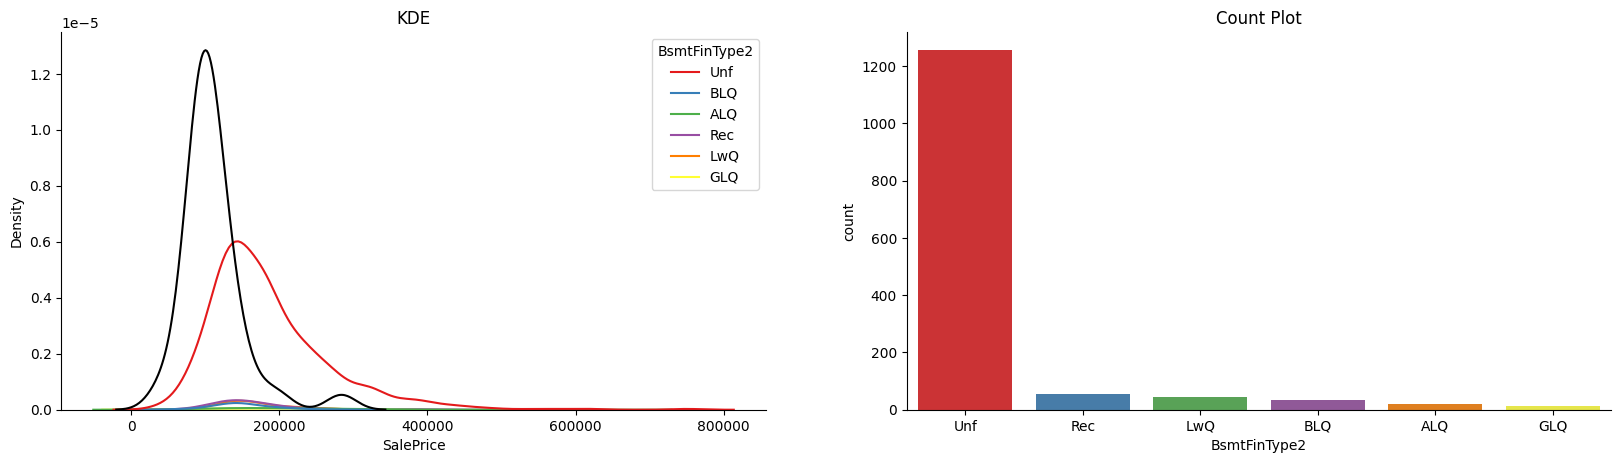

Black for KDE is missing values

Missing values make up : 2.6% of this dataset

The mode is : Unf

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for Electrical



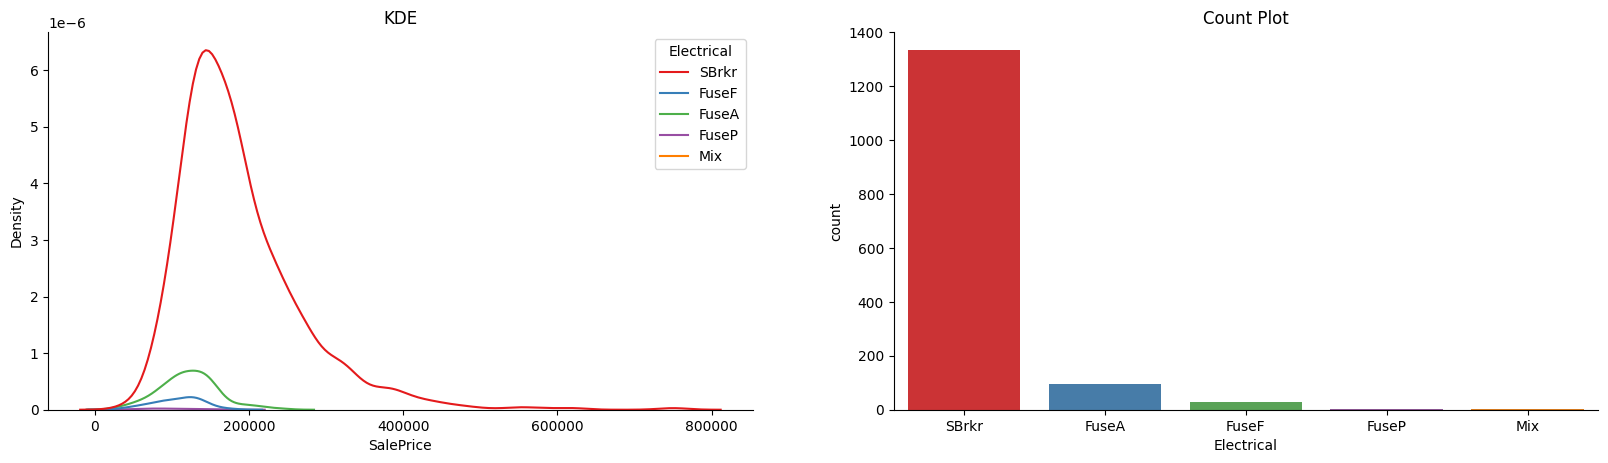

Black for KDE is missing values

Missing values make up : 0.0685% of this dataset

The mode is : SBrkr

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for FireplaceQu



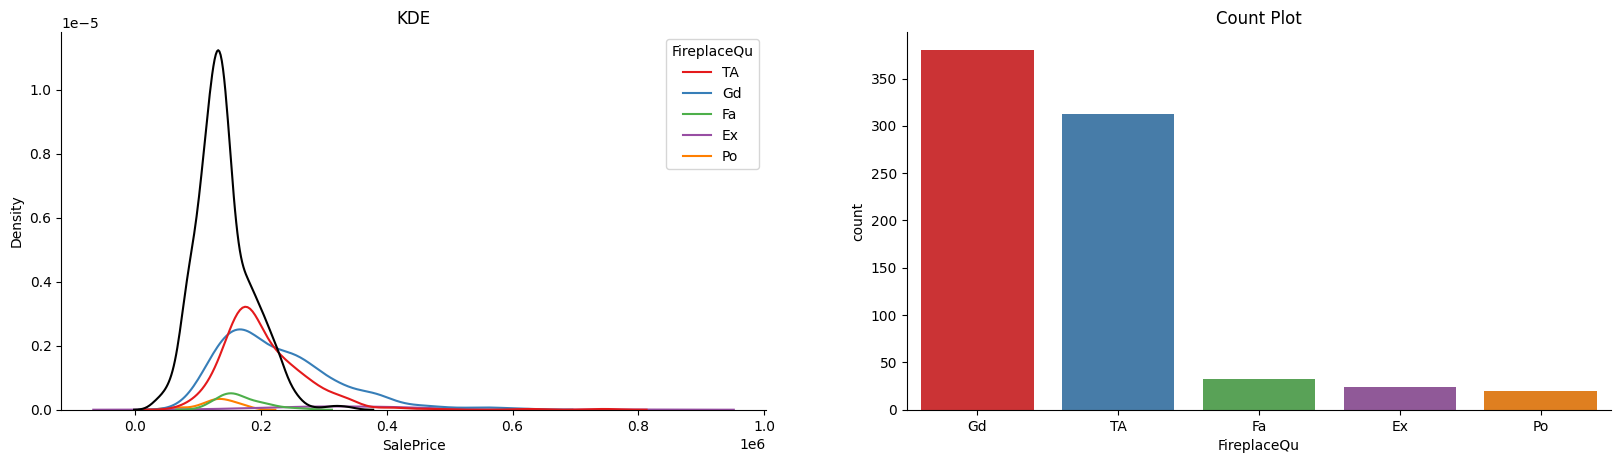

Black for KDE is missing values

Missing values make up : 47.3% of this dataset

The mode is : Gd

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for GarageType



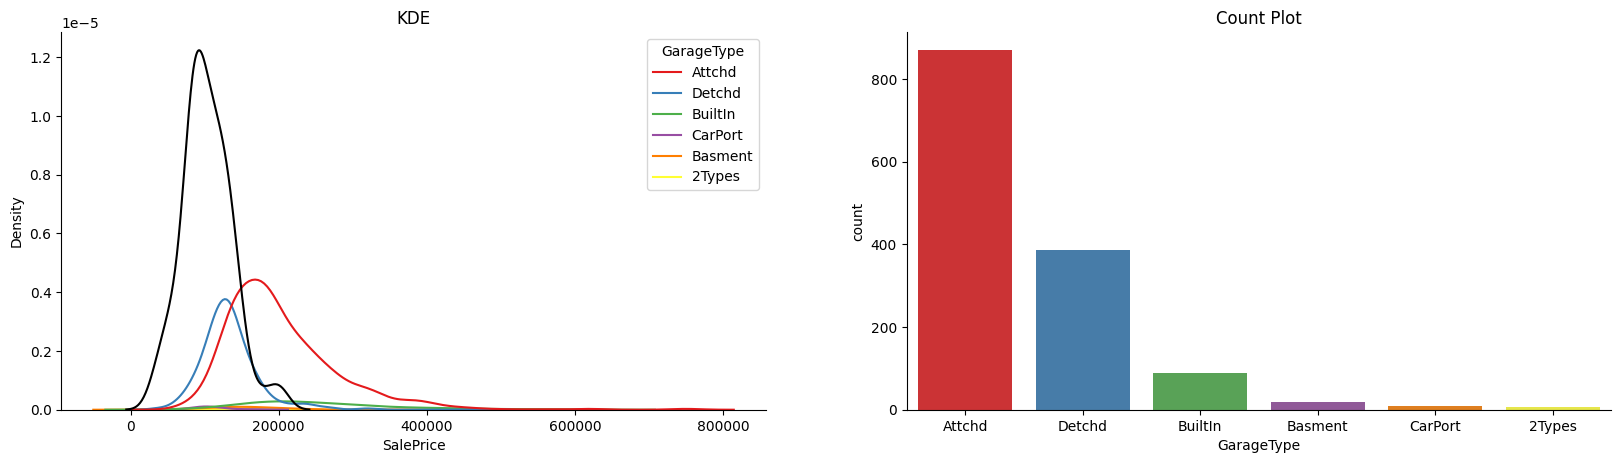

Black for KDE is missing values

Missing values make up : 5.55% of this dataset

The mode is : Attchd

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for GarageFinish



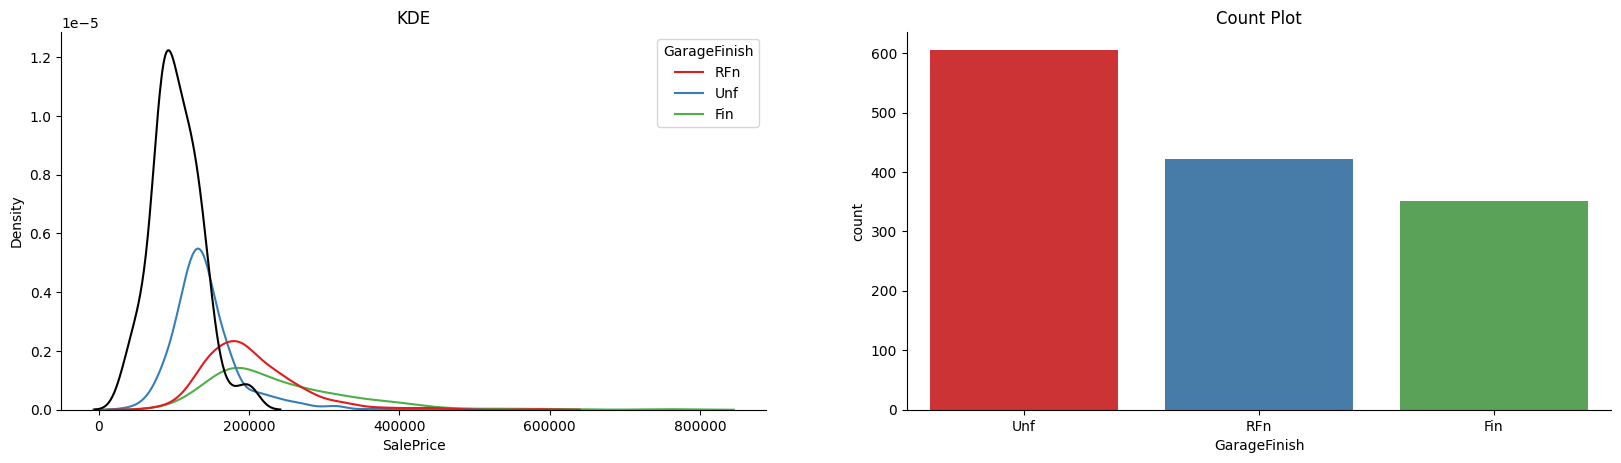

Black for KDE is missing values

Missing values make up : 5.55% of this dataset

The mode is : Unf

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for GarageQual



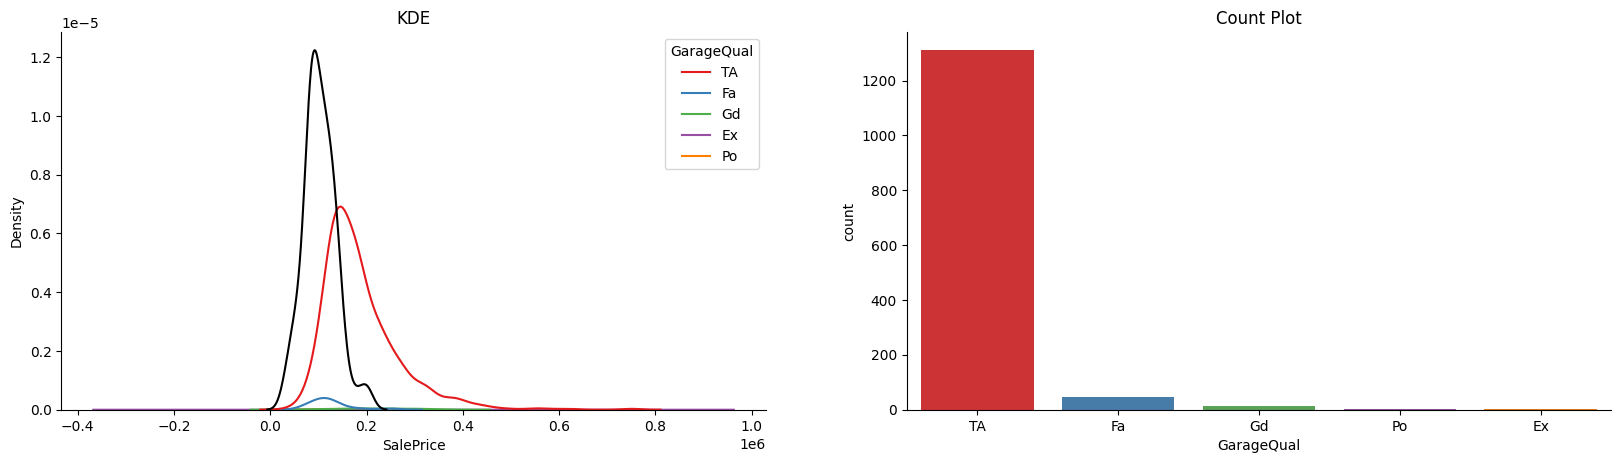

Black for KDE is missing values

Missing values make up : 5.55% of this dataset

The mode is : TA

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Visualisation for GarageCond



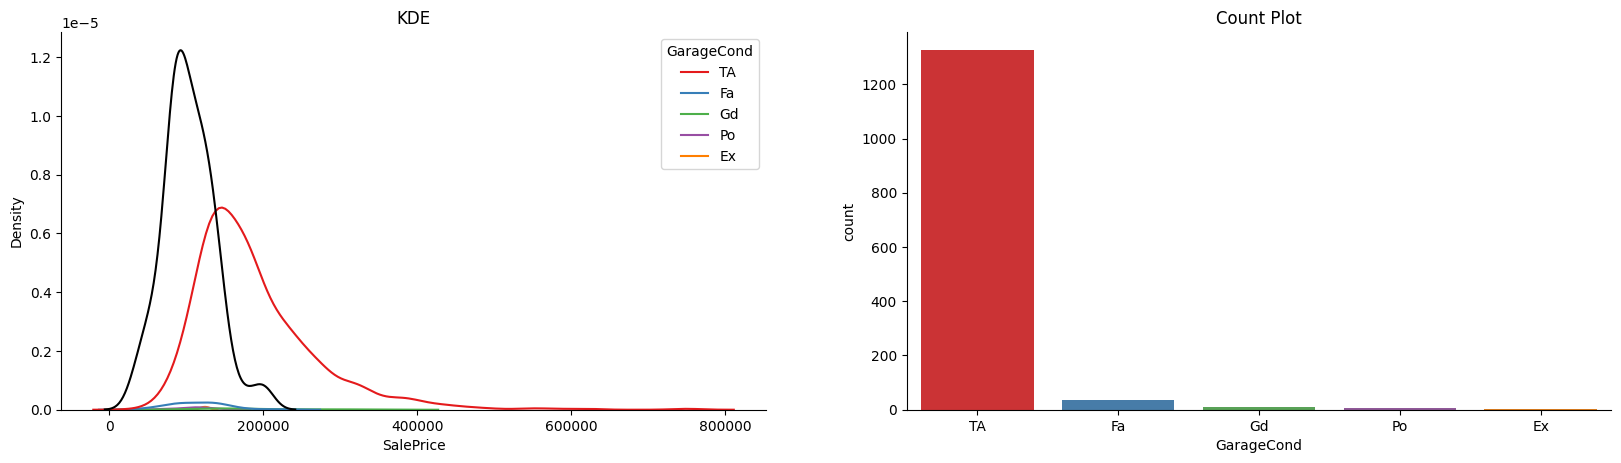

Black for KDE is missing values

Missing values make up : 5.55% of this dataset

The mode is : TA

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 




In [5]:
def diagnostic_plots(train, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.
    
    print(f'Visualisation for {variable}\n')
    
    # Define figure size.
    plt.figure(figsize=(20, 5),dpi=100)

    # KDE
    plt.subplot(1, 2, 1)
    sns.despine()
    sns.kdeplot(data=train, x="SalePrice", hue=variable, palette="Set1")
    sns.kdeplot(train[train[variable].isnull()]['SalePrice'], color='black')
    plt.title('KDE')
    
    # ascending
    large_to_small = train.groupby(variable).size().sort_values().index[::-1]
    
    # Countplot
    plt.subplot(1, 2, 2)
    sns.despine()
    sns.countplot(data=train, x=train[variable], order=large_to_small, palette="Set1")
    plt.title('Count Plot')
    
    plt.show()
    print(f'Black for KDE is missing values\n')
    print(f"Missing values make up : {train[variable].isnull().sum()/len(train[variable])*100:.3}% of this dataset\n")
    print(f"The mode is : {train[variable].mode()[0]}\n")
    print('_ ' * 40)
    print('_ ' * 40)
    print(f"\n")

    
# visually analysing the object columns
for i in train.columns:
    if train[i].dtype == object and train[i].isnull().sum() > 0:
        diagnostic_plots(train, i)

In [6]:
#  MasVnrType
train['MasVnrType'] = train['MasVnrType'].fillna('BrkFace')
test['MasVnrType'] = test['MasVnrType'].fillna('BrkFace')

# GarageFinish
train['GarageFinish'] = train['GarageFinish'].fillna('Detchd')
test['GarageFinish'] = test['GarageFinish'].fillna('Detchd')

# FireplaceQu
train['FireplaceQu'] = train['FireplaceQu'].fillna('Unknown')
test['FireplaceQu'] = test['FireplaceQu'].fillna('Unknown')

# filling the rest with mode
for i in train.columns:
    if train[i].dtype == object:
        # mode
        mode = train[i].mode()
        # filling with mode
        train[i] = train[i].fillna(mode[0])
        test[i] = test[i].fillna(mode[0])

In [7]:
# revisiting the nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)

,Column,Null %,Data type
0,LotFrontage,17.740000,float64
2,GarageYrBlt,5.550000,float64
1,MasVnrArea,0.550000,float64


Now we will deal with the remaining null values in our dataset, these values will be imputed with the median.

In [8]:
# we will use the median to fill these null values
new_missing_values = []

for i in missing_values:
    if train[i].dtype == float:
        new_missing_values.append(i)
        
        # using median of train to fill na values (to avoid overfitting)
        median = train[i].median()
        
        # for illustrative purposes
        mean = train[i].mean()
        
        # filling na values with median
        train[f"{i}_median"] = train[i].fillna(median)
        test[f"{i}_median"] = test[i].fillna(median)
        
        # filling na values with mean
        train[f"{i}_mean"] = train[i].fillna(mean)
        test[f"{i}_mean"] = test[i].fillna(mean)
    else:
        continue

#### Mean vs Median


The top half is the Median and the bottom is the Mean.


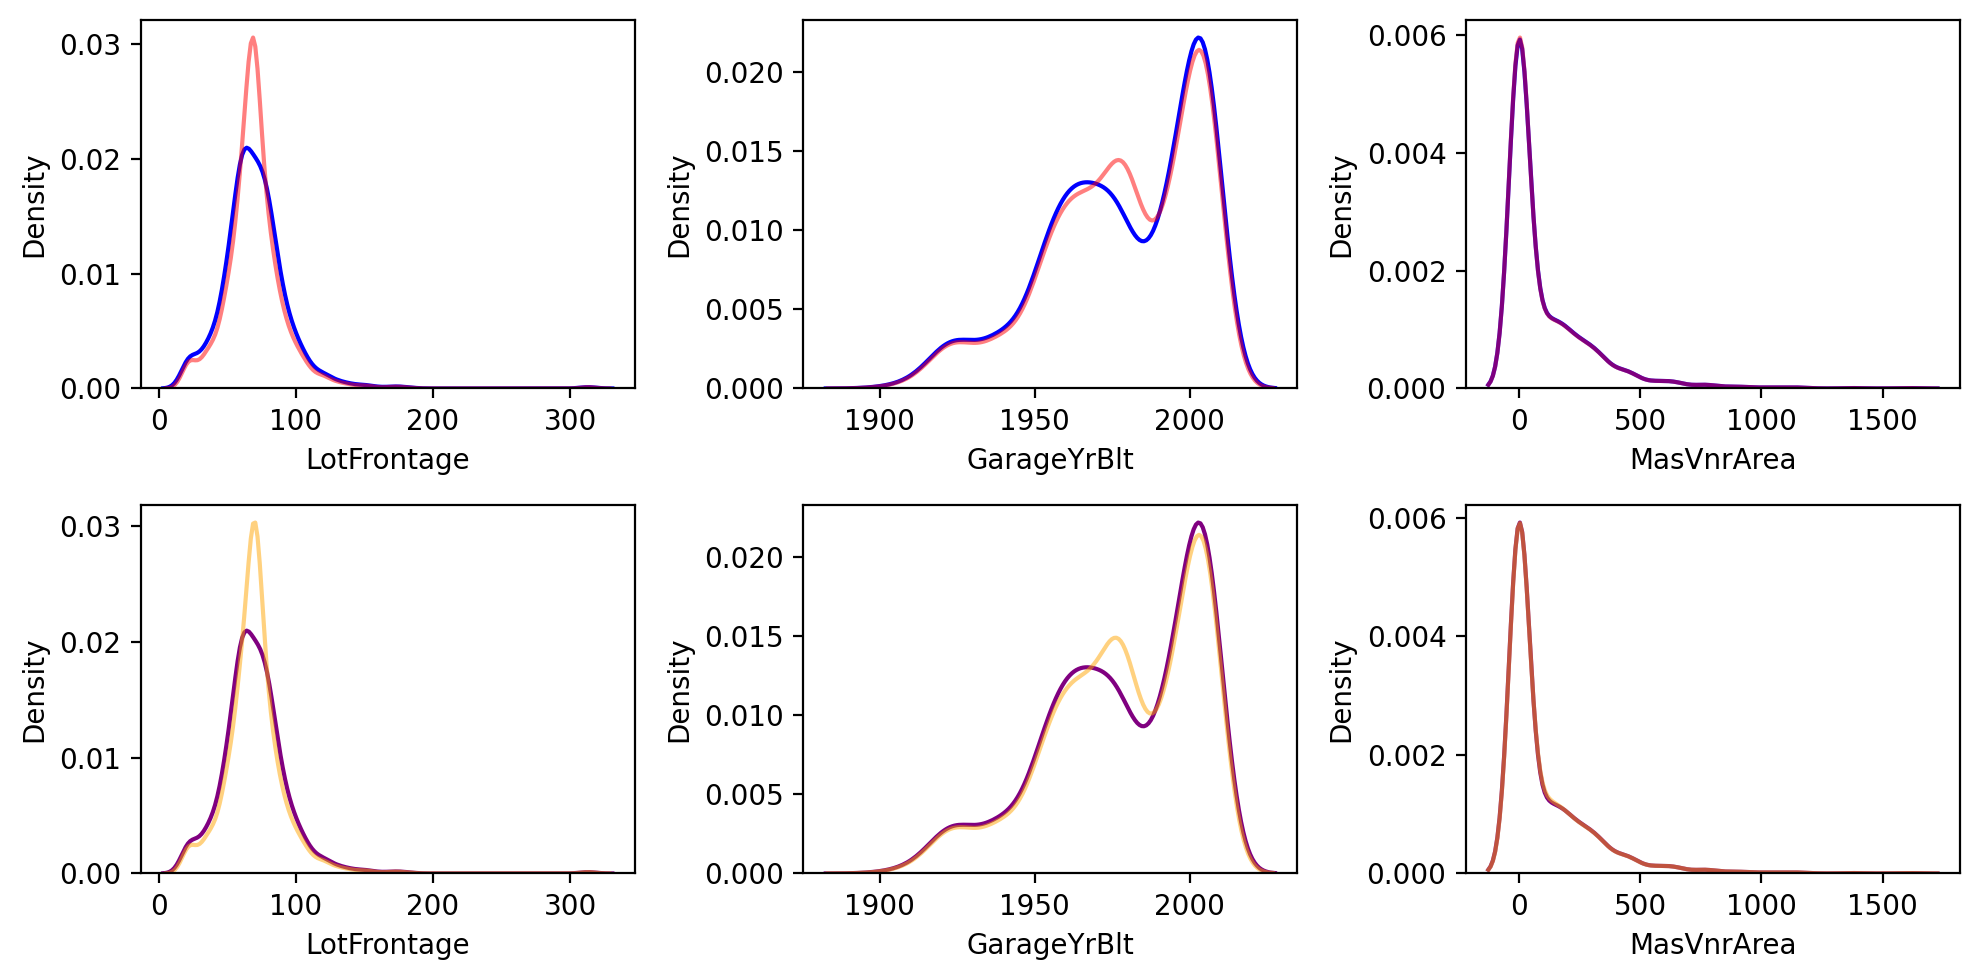

In [9]:
fig, ax = plt.subplots(2, 3,figsize=(10, 5),dpi=200)

print(f"\nThe top half is the Median and the bottom is the Mean.")

# KDE 1
sns.kdeplot(train['LotFrontage'], x = 'SalePrice',color="blue", label='LotFrontage', ax=ax[0,0])
sns.kdeplot(train['LotFrontage_median'], x = 'SalePrice', color='red',label='LotFrontage_median', ax=ax[0,0], alpha=0.5)

# KDE 2
sns.kdeplot(train['GarageYrBlt'], x = 'SalePrice', color="blue", label='GarageYrBlt', ax=ax[0,1])
sns.kdeplot(train['GarageYrBlt_median'], x = 'SalePrice', color='red',label='GarageYrBlt_median', ax=ax[0,1], alpha=0.5)

# KDE 3
sns.kdeplot(train['MasVnrArea'], x = 'SalePrice', color="blue", label='MasVnrArea', ax=ax[0,2])
sns.kdeplot(train['MasVnrArea_median'], x = 'SalePrice', color='red',label='MasVnrArea_median', ax=ax[0,2], alpha=0.5)

# KDE 4
sns.kdeplot(train['LotFrontage'], x = 'SalePrice',color="purple", label='LotFrontage', ax=ax[1,0])
sns.kdeplot(train['LotFrontage_mean'], x = 'SalePrice', color='orange',label='LotFrontage_mean', ax=ax[1,0], alpha=0.5)

# KDE 5
sns.kdeplot(train['GarageYrBlt'], x = 'SalePrice', color="purple", label='GarageYrBlt', ax=ax[1,1])
sns.kdeplot(train['GarageYrBlt_mean'], x = 'SalePrice', color='orange',label='GarageYrBlt_mean', ax=ax[1,1], alpha=0.5)

# KDE 6
sns.kdeplot(train['MasVnrArea'], x = 'SalePrice', color="purple", label='MasVnrArea', ax=ax[1,2])
sns.kdeplot(train['MasVnrArea_mean'], x = 'SalePrice', color='orange',label='MasVnrArea_mean',ax=ax[1,2], alpha=0.5)

plt.tight_layout()
plt.show()

They both have the same distribution, however, I will fill the nan values with the median.

In [10]:
# filling na with median TRAIN
train['LotFrontage'] = train['LotFrontage_median']
train['GarageYrBlt'] = train['GarageYrBlt_median']
train['MasVnrArea'] = train['MasVnrArea_median']

# dropping columns
train.drop(columns=['LotFrontage_median','GarageYrBlt_median', 'MasVnrArea_median',
                    'LotFrontage_mean', 'GarageYrBlt_mean', 'MasVnrArea_mean'], inplace= True)

# dropping columns
test.drop(columns=['LotFrontage_median','GarageYrBlt_median', 'MasVnrArea_median',
                    'LotFrontage_mean', 'GarageYrBlt_mean', 'MasVnrArea_mean'], inplace= True)


for i in test.columns:
    if test[i].dtype == float:
        test[i] = test[i].fillna(train[i].median())

#### Dealing with outliers

In [11]:
def diagnostic_plots(df, variable):
    
    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.tight_layout()
    plt.show()

Id Outlier visualisation
Correlation w/ SalePrice : -0.021916719443431112 


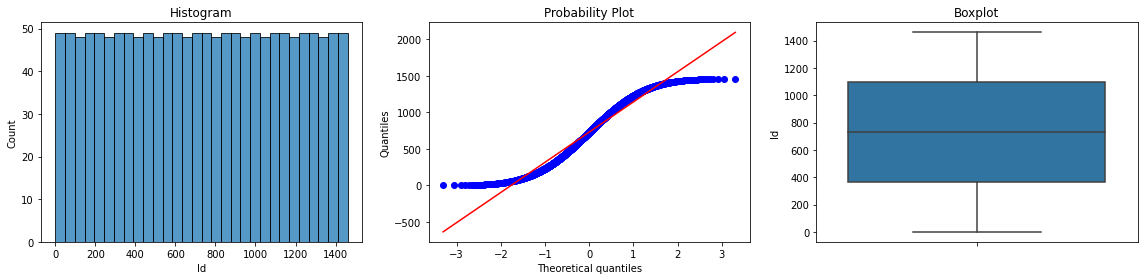

MSSubClass Outlier visualisation
Correlation w/ SalePrice : -0.08428413512659531 


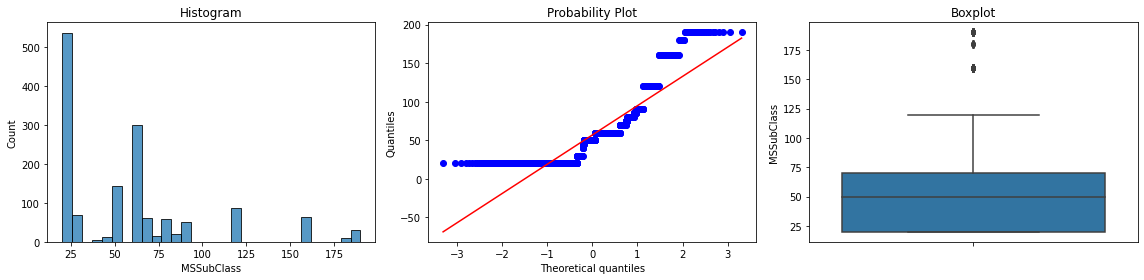

LotFrontage Outlier visualisation
Correlation w/ SalePrice : 0.33477085313975996 


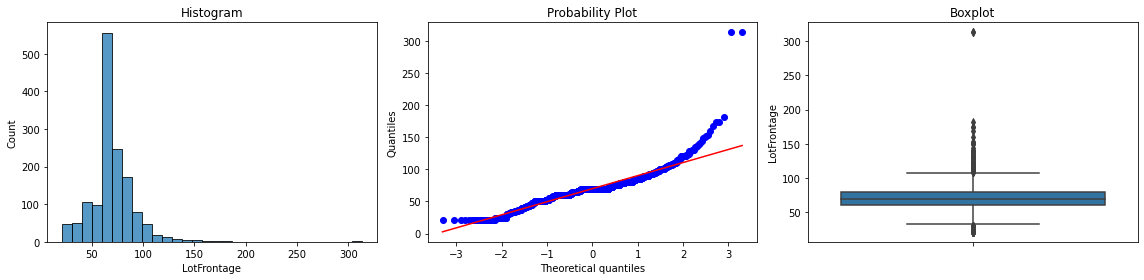

LotArea Outlier visualisation
Correlation w/ SalePrice : 0.2638433538714057 


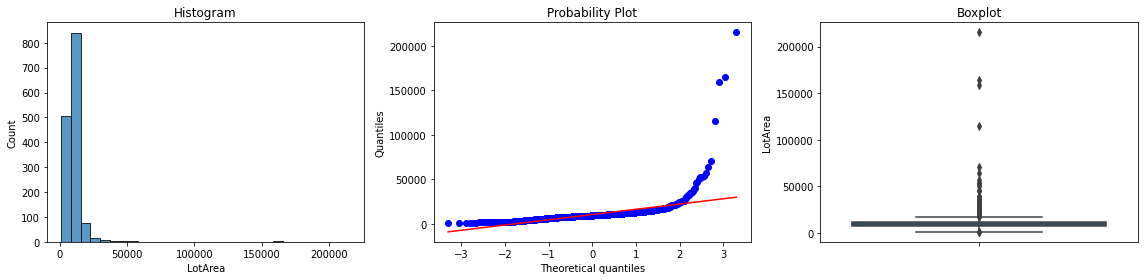

OverallQual Outlier visualisation
Correlation w/ SalePrice : 0.7909816005838044 


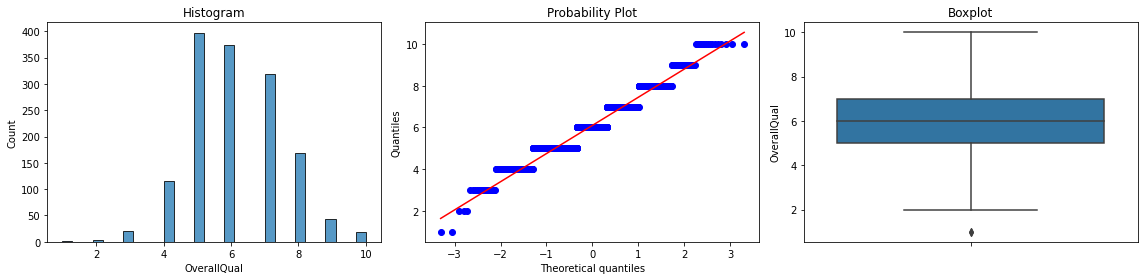

OverallCond Outlier visualisation
Correlation w/ SalePrice : -0.07785589404867803 


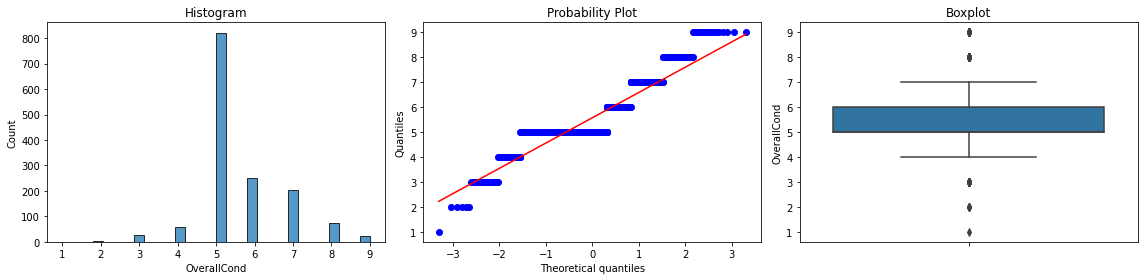

YearBuilt Outlier visualisation
Correlation w/ SalePrice : 0.5228973328794969 


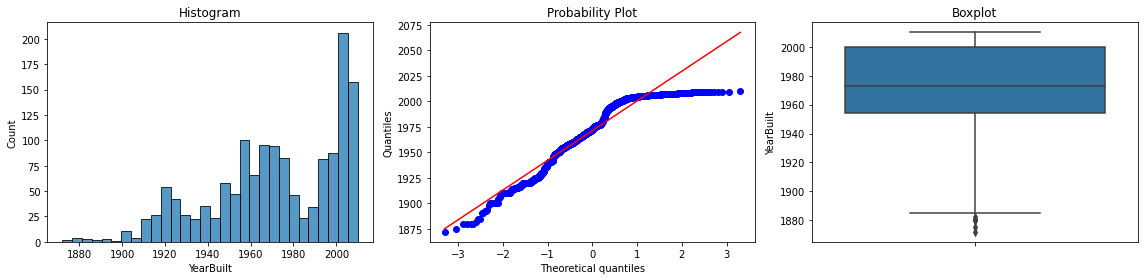

YearRemodAdd Outlier visualisation
Correlation w/ SalePrice : 0.5071009671113864 


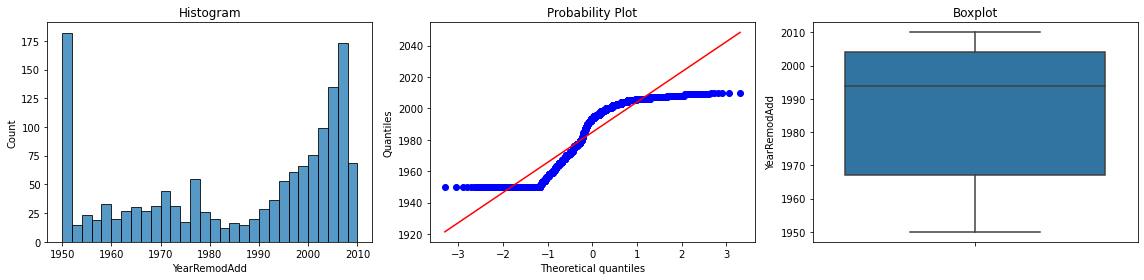

MasVnrArea Outlier visualisation
Correlation w/ SalePrice : 0.47261449900457475 


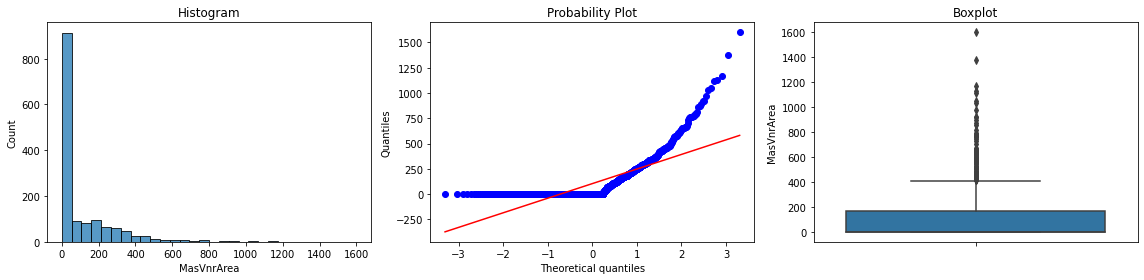

BsmtFinSF1 Outlier visualisation
Correlation w/ SalePrice : 0.3864198062421532 


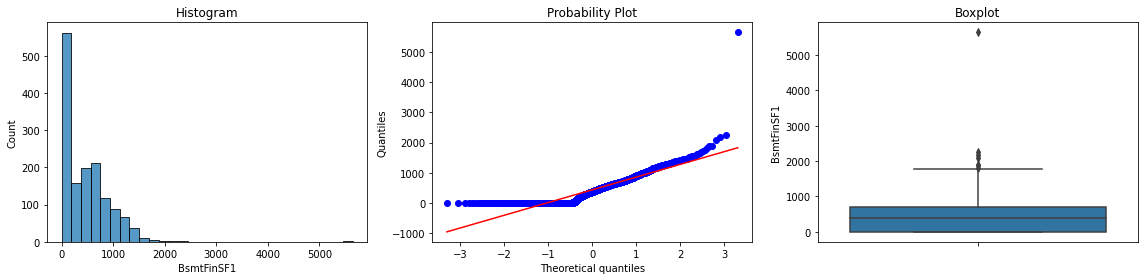

BsmtFinSF2 Outlier visualisation
Correlation w/ SalePrice : -0.011378121450215127 


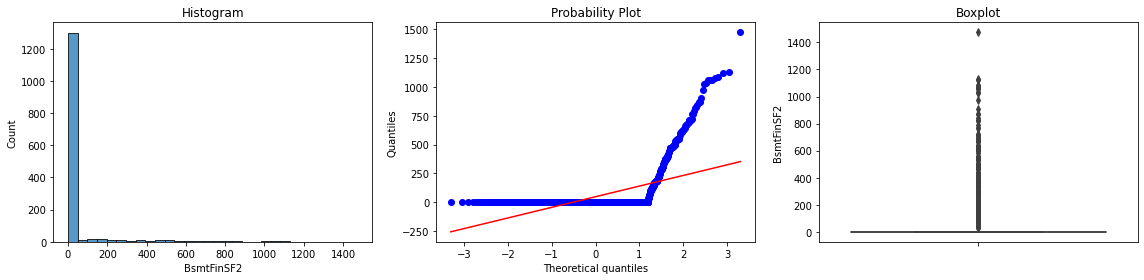

BsmtUnfSF Outlier visualisation
Correlation w/ SalePrice : 0.21447910554696892 


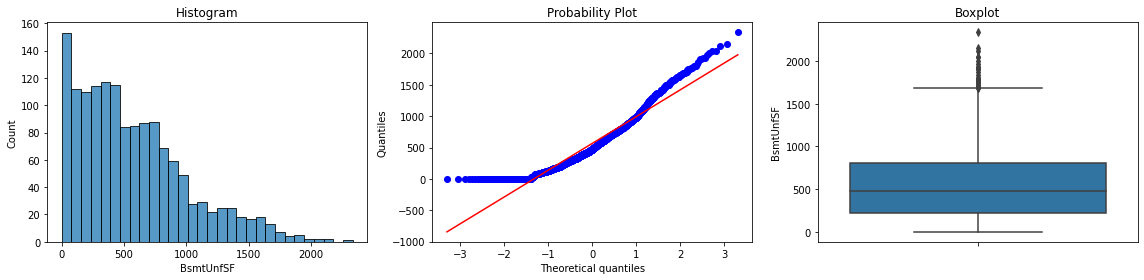

TotalBsmtSF Outlier visualisation
Correlation w/ SalePrice : 0.6135805515591956 


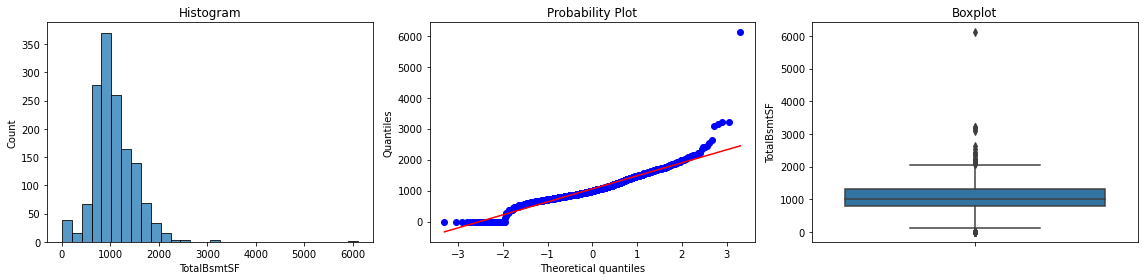

1stFlrSF Outlier visualisation
Correlation w/ SalePrice : 0.6058521846919147 


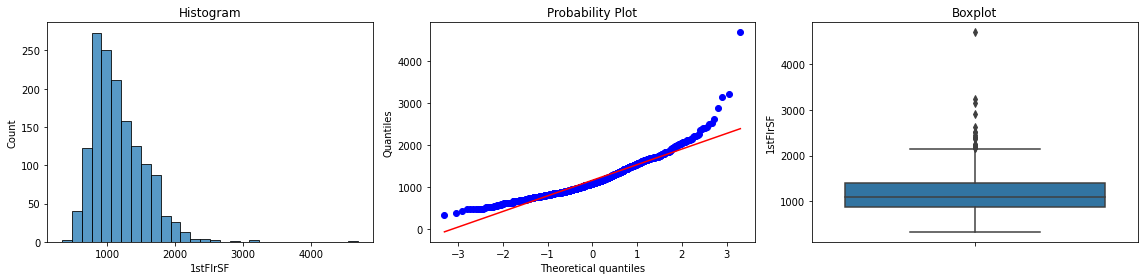

2ndFlrSF Outlier visualisation
Correlation w/ SalePrice : 0.3193338028320681 


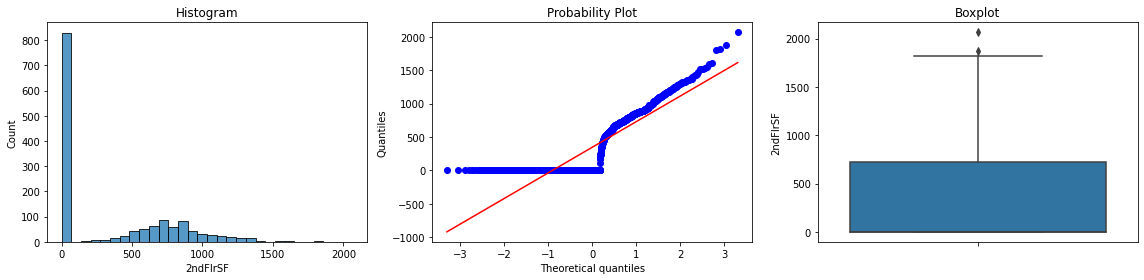

LowQualFinSF Outlier visualisation
Correlation w/ SalePrice : -0.025606130000679593 


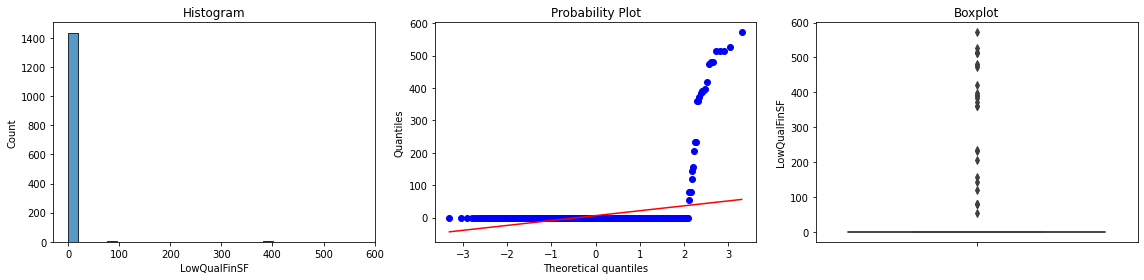

GrLivArea Outlier visualisation
Correlation w/ SalePrice : 0.7086244776126523 


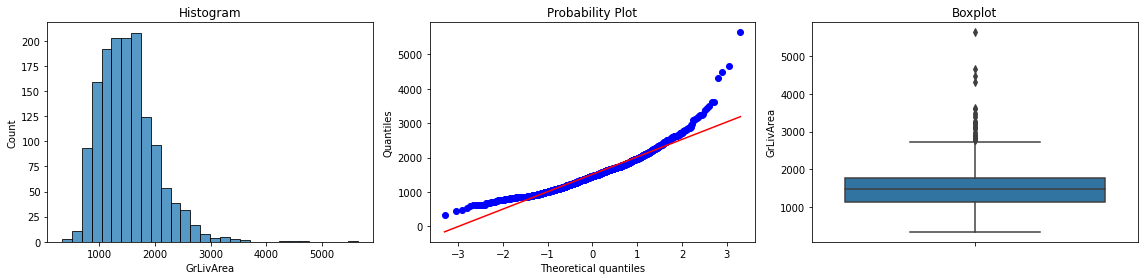

BsmtFullBath Outlier visualisation
Correlation w/ SalePrice : 0.2271222331314938 


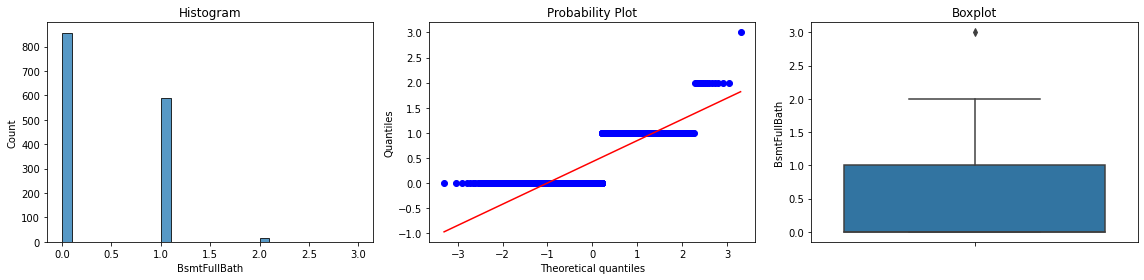

BsmtHalfBath Outlier visualisation
Correlation w/ SalePrice : -0.016844154297359016 


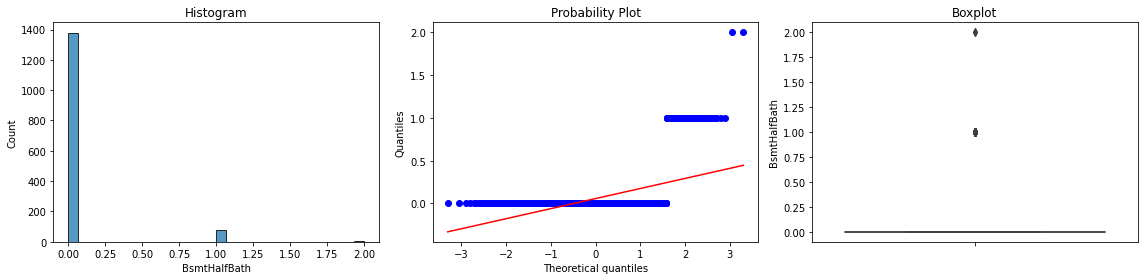

FullBath Outlier visualisation
Correlation w/ SalePrice : 0.5606637627484449 


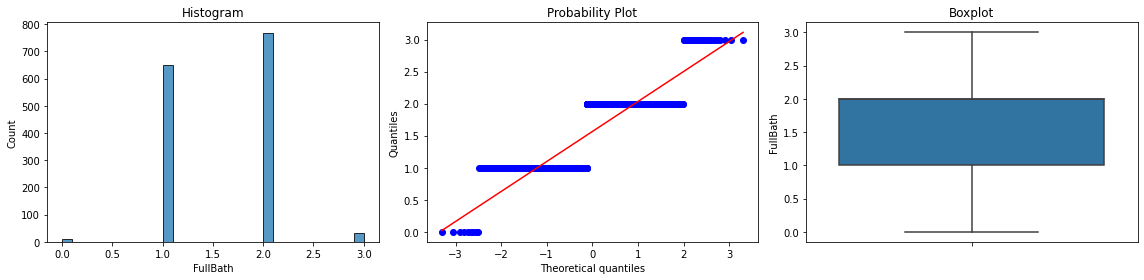

HalfBath Outlier visualisation
Correlation w/ SalePrice : 0.2841076755947831 


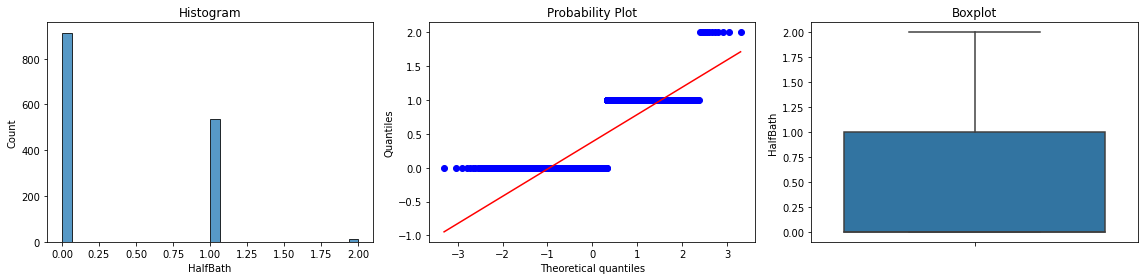

BedroomAbvGr Outlier visualisation
Correlation w/ SalePrice : 0.16821315430073985 


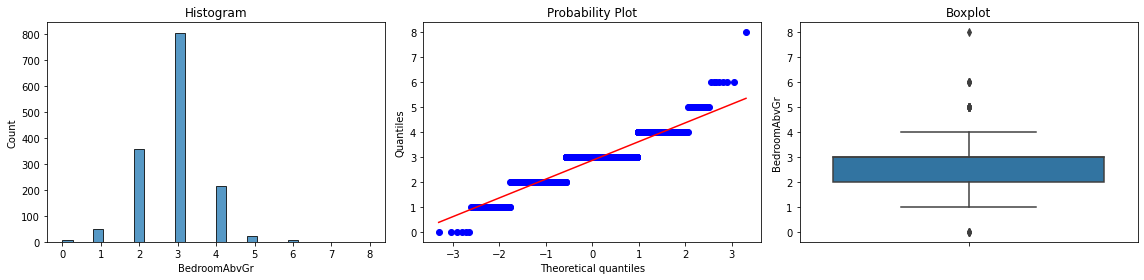

KitchenAbvGr Outlier visualisation
Correlation w/ SalePrice : -0.13590737084214122 


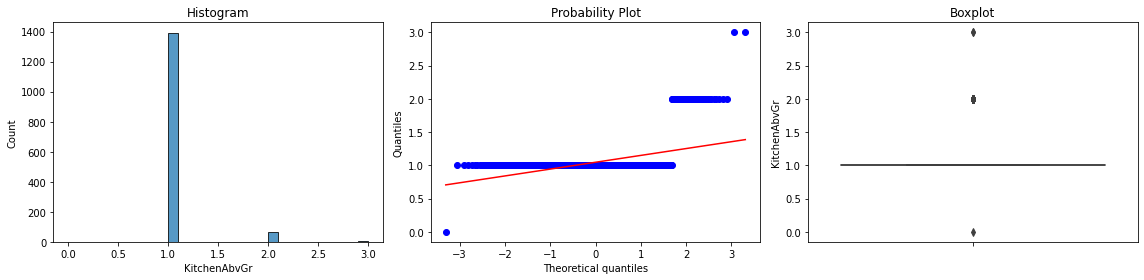

TotRmsAbvGrd Outlier visualisation
Correlation w/ SalePrice : 0.5337231555820282 


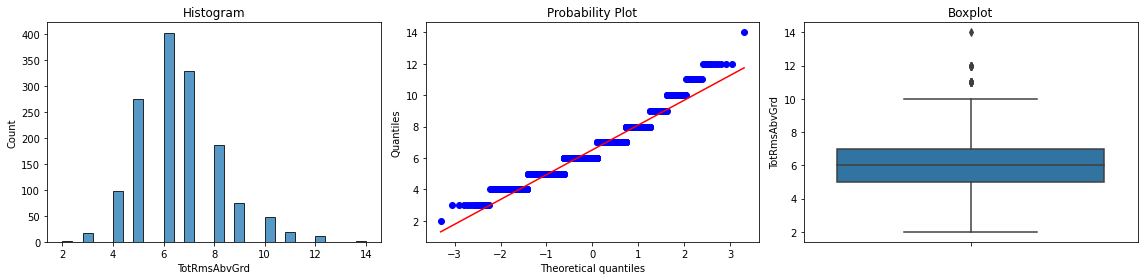

Fireplaces Outlier visualisation
Correlation w/ SalePrice : 0.4669288367515272 


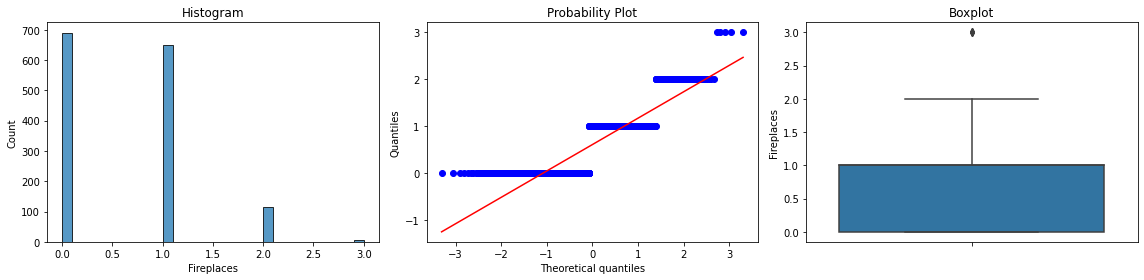

GarageYrBlt Outlier visualisation
Correlation w/ SalePrice : 0.4667536523633399 


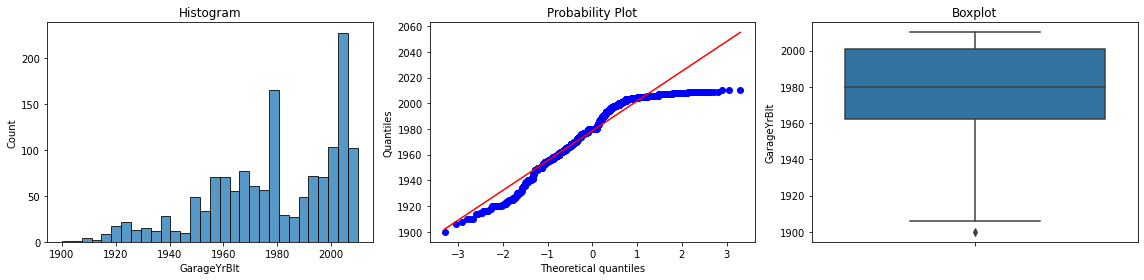

GarageCars Outlier visualisation
Correlation w/ SalePrice : 0.6404091972583529 


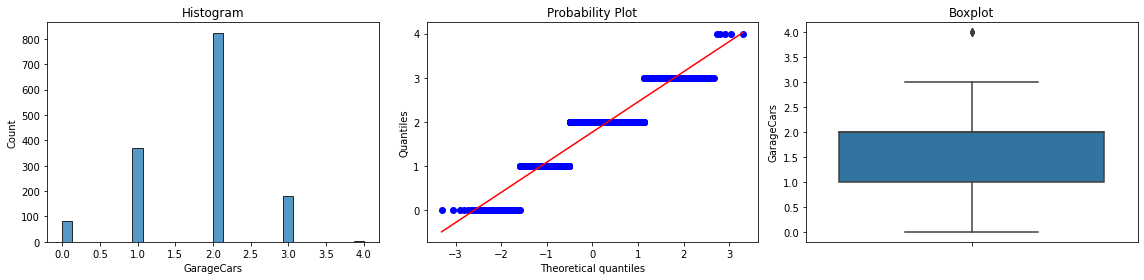

GarageArea Outlier visualisation
Correlation w/ SalePrice : 0.6234314389183618 


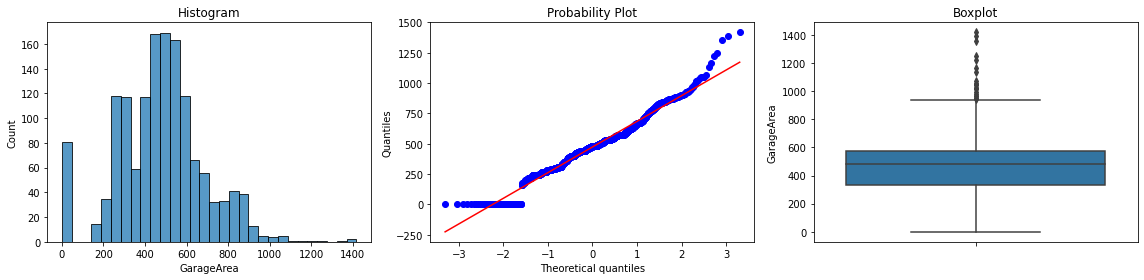

WoodDeckSF Outlier visualisation
Correlation w/ SalePrice : 0.3244134445681295 


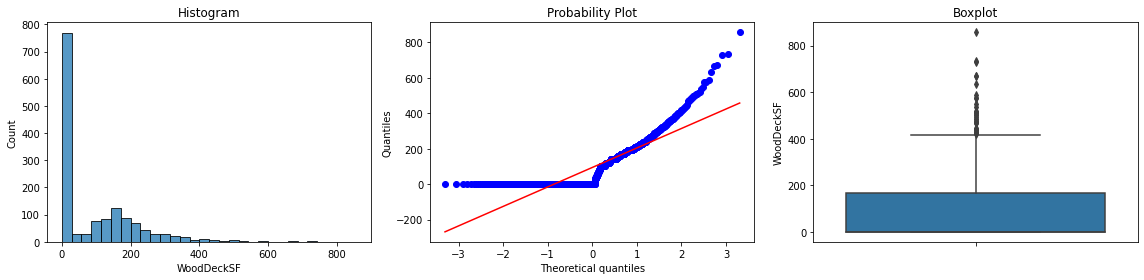

OpenPorchSF Outlier visualisation
Correlation w/ SalePrice : 0.31585622711605554 


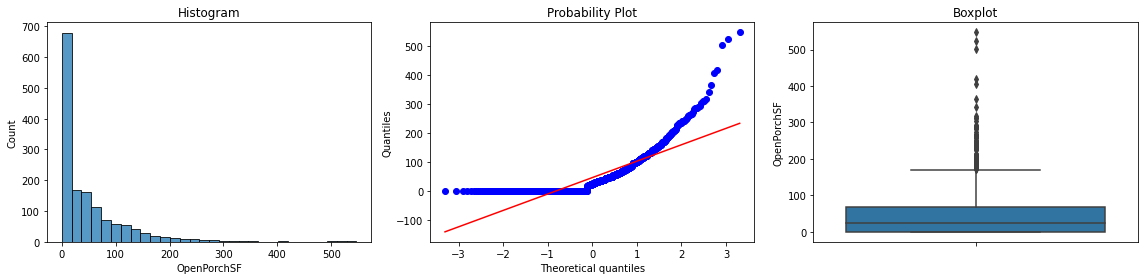

EnclosedPorch Outlier visualisation
Correlation w/ SalePrice : -0.12857795792595653 


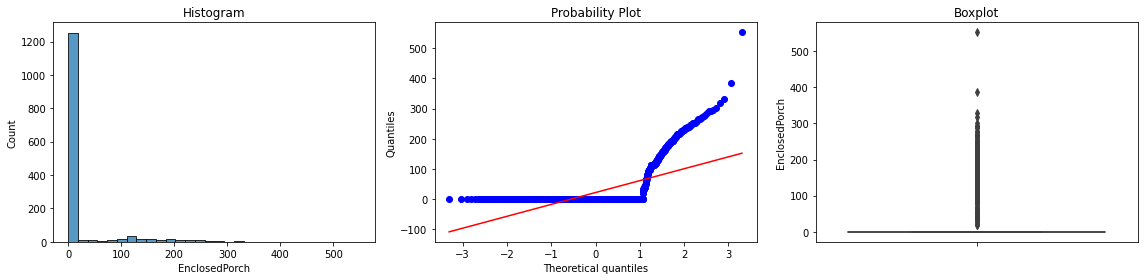

3SsnPorch Outlier visualisation
Correlation w/ SalePrice : 0.04458366533574846 


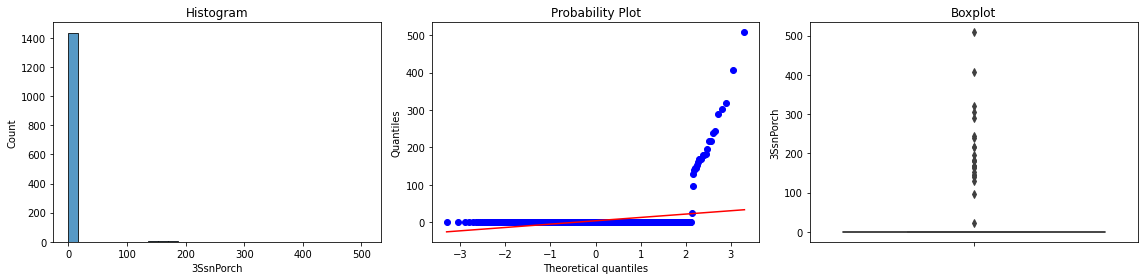

ScreenPorch Outlier visualisation
Correlation w/ SalePrice : 0.11144657114291107 


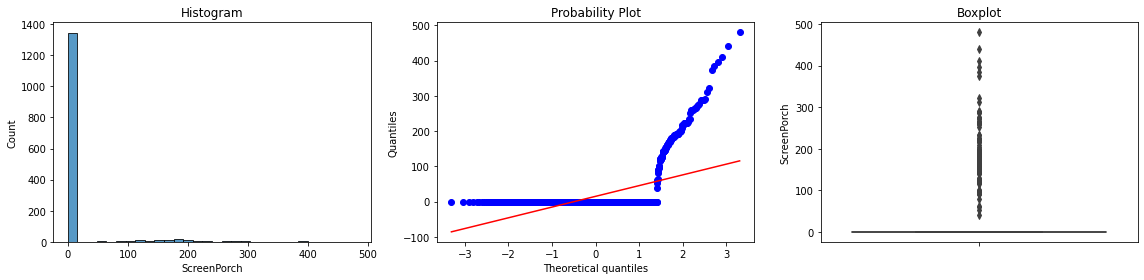

PoolArea Outlier visualisation
Correlation w/ SalePrice : 0.09240354949187321 


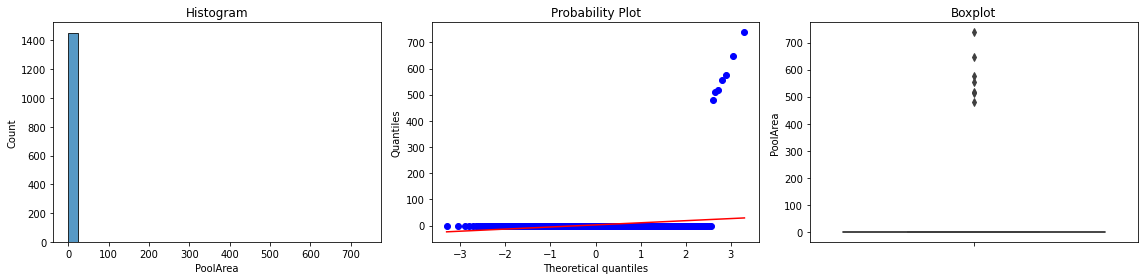

MiscVal Outlier visualisation
Correlation w/ SalePrice : -0.021189579640303255 


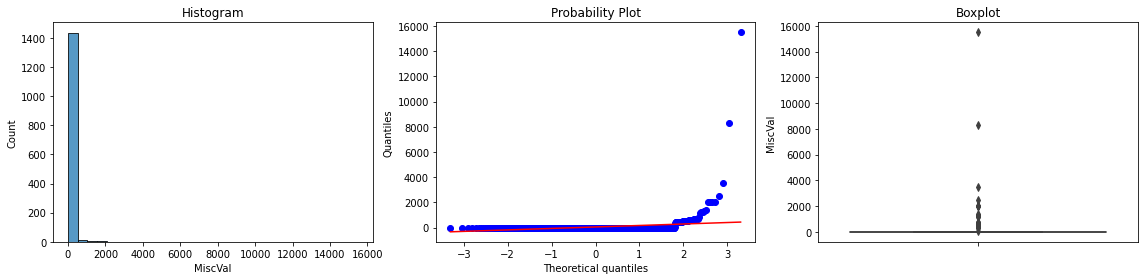

MoSold Outlier visualisation
Correlation w/ SalePrice : 0.04643224522381938 


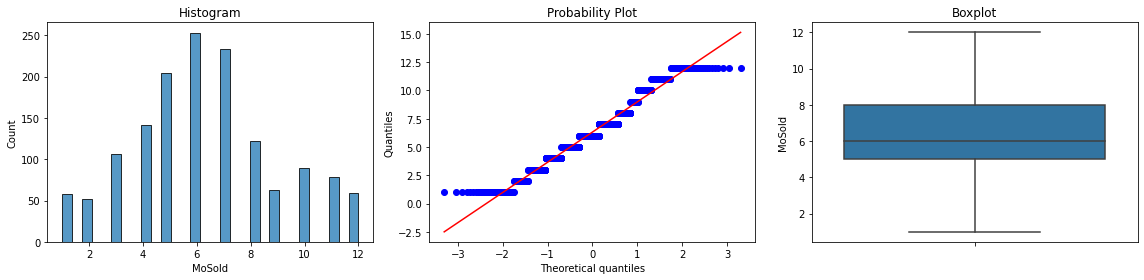

YrSold Outlier visualisation
Correlation w/ SalePrice : -0.028922585168730374 


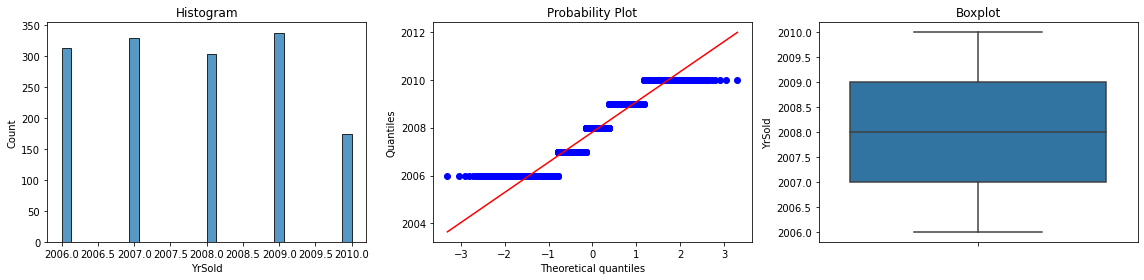

SalePrice Outlier visualisation
Correlation w/ SalePrice : 1.0 


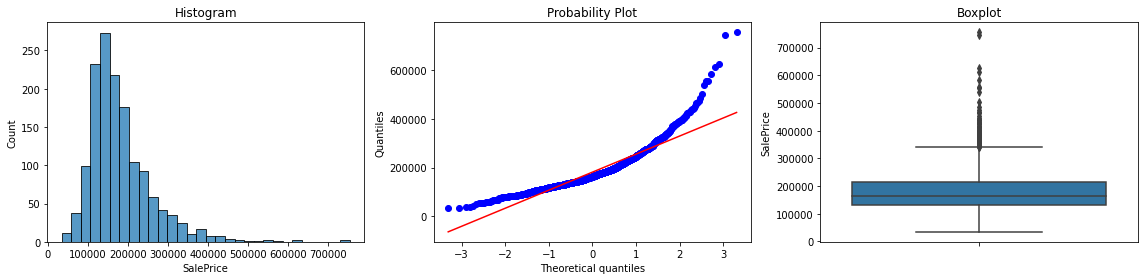

In [12]:
for i in train.columns:
    if train[i].dtype == int or train[i].dtype == float:
        print(f"{i} Outlier visualisation")
        print(f"Correlation w/ SalePrice : {train['SalePrice'].corr(train[i])} ")
        diagnostic_plots(train, i)

In [13]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 497.9 kB/s eta 0:00:00


In [14]:
from feature_engine.outliers import Winsorizer

def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [15]:
outliers = ['MSSubClass',
'LotFrontage',
'LotArea',
'OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtHalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold']

In [16]:
for i in outliers:
    # finding the outliers
    upper_limit, lower_limit = find_boundaries(train, i)

    # Now replacing the outliers by the maximum and minimum limit
    train[i] = np.where(train[i] > upper_limit, upper_limit,
                           np.where(train[i] < lower_limit, lower_limit, train[i]))
    test[i] = np.where(test[i] > upper_limit, upper_limit,
                       np.where(test[i] < lower_limit, lower_limit, test[i]))

In [17]:
dummy_col = [i for i in train.columns if train[i].dtype == object]

# creating dummies
pd.concat([train[dummy_col], pd.get_dummies(train[dummy_col])], axis=1)
pd.concat([test[dummy_col], pd.get_dummies(train[dummy_col])], axis=1)

# dropping 
train.drop(columns=dummy_col, inplace=True)
test.drop(columns=dummy_col, inplace=True)

Without log

In [18]:
target = train['SalePrice']
features = train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.8283727249656707
Test data r-squared: 0.8065587742635295


With log

In [19]:
target = np.log(train['SalePrice']) # Use log prices
features = train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))


Training data r-squared: 0.885991928769161
Test data r-squared: 0.8870490608629706


In [20]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['BsmtUnfSF'], axis=1)
X_incl_const = X_incl_const.drop(['BsmtHalfBath'], axis=1)
X_incl_const = X_incl_const.drop(['FullBath'], axis=1)
X_incl_const = X_incl_const.drop(['3SsnPorch'], axis=1)
X_incl_const = X_incl_const.drop(['MoSold'], axis=1)
X_incl_const = X_incl_const.drop(['TotRmsAbvGrd'], axis=1)
X_incl_const = X_incl_const.drop(['BsmtFinSF2'], axis=1)
X_incl_const = X_incl_const.drop(['Id'], axis=1)
X_incl_const = X_incl_const.drop(['HalfBath'], axis=1)
X_incl_const = X_incl_const.drop(['GarageYrBlt'], axis=1)
X_incl_const = X_incl_const.drop(['OpenPorchSF'], axis=1)
X_incl_const = X_incl_const.drop(['GarageArea'], axis=1)
X_incl_const = X_incl_const.drop(['MasVnrArea'], axis=1)
X_incl_const = X_incl_const.drop(['LotFrontage'], axis=1)
X_incl_const = X_incl_const.drop(['EnclosedPorch'], axis=1)
X_incl_const = X_incl_const.drop(['BedroomAbvGr'], axis=1)
X_incl_const = X_incl_const.drop(['PoolArea'], axis=1)
X_incl_const = X_incl_const.drop(['MiscVal'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)}).sort_values('p-value',ascending=False)

,coef,p-value
1stFlrSF,0.000,0.023
BsmtFullBath,0.024,0.023
YrSold,-0.008,0.012
KitchenAbvGr,17.290,0.004
LowQualFinSF,-0.000,0.004
MSSubClass,-0.000,0.003
WoodDeckSF,0.000,0.001
ScreenPorch,0.000,0.001
BsmtFinSF1,0.000,0.000
TotalBsmtSF,0.000,0.000


In [21]:
coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -1256.968824218056
r-squared is 0.8846444660221225


In [22]:
y_pred = regr.predict(X_test)

In [23]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.1
Mean squared error = 0.02
Median absolute error = 0.08
Explain variance score = 0.89
R2 score = 0.89


In [24]:
for i in test.columns:
    if test[i].isnull().sum() > 0:
        print(i)

In [25]:
wanted_cols = [i for i in X_incl_const.columns]

X_train = train[wanted_cols]
y_train = np.log(train.iloc[:, -1].values)
X_test = test[wanted_cols]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([11.69212467, 11.97930518, 12.09241708, ..., 12.16337585,
       11.66053783, 12.3946109 ])

In [27]:
final_test = pd.read_csv(test_data)

final = final_test['Id']
submission = pd.DataFrame(final)
submission['SalePrice'] = np.exp(y_pred)